## Computer Vision(CS 436, CS5310, EE513) Programming Assignment#3 Part#1

### Currently there are lots of professional cartoonizer applications available in the market but most of the them are not freeware, you don't need powerful rendering software or even years of experience to develop such an application(as you will see in this assignment) All you need is essentially a bilateral filter and some edge detection. You are allowed to use opencv for this assigment

## Step#1
### In this step we will be applying a bilateral filter on our input image. A bilateral filter is used for smoothening images and reducing noise, while preserving edges, because a bilateral filter smooths flat regions while keeping edges sharp, it is ideally suited to convert an RGB image into a cartoon. Unfortunately, bilateral filters are orders of magnitudes slower than other smoothing operators (e.g., Gaussian blur). Thus, if speed is important, it might be a good idea to operate on a down-scaled version of the original image first and then upscale it afterwards.

In [0]:
#required imports
import matplotlib
from mpl_toolkits import mplot3d
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib import image as mpimg
from matplotlib.pyplot import figure
import cv2
import numpy as np
from math import sqrt
import matplotlib.pylab as pl
from google.colab.patches import cv2_imshow
%matplotlib inline

(1200, ' ', 948)
[[[12 11 16]
  [12 11 16]
  [12 11 16]
  ...
  [61 66 81]
  [61 66 81]
  [61 66 81]]

 [[12 11 16]
  [12 11 16]
  [12 11 16]
  ...
  [61 66 81]
  [61 66 81]
  [61 66 81]]

 [[12 11 16]
  [12 11 16]
  [12 11 16]
  ...
  [61 66 81]
  [61 66 81]
  [61 66 81]]

 ...

 [[34 42 58]
  [34 42 58]
  [34 42 58]
  ...
  [45 60 86]
  [45 60 86]
  [45 60 86]]

 [[34 42 58]
  [34 42 58]
  [34 42 58]
  ...
  [45 60 86]
  [45 60 86]
  [45 60 86]]

 [[34 42 58]
  [34 42 58]
  [34 42 58]
  ...
  [45 60 86]
  [45 60 86]
  [45 60 86]]]


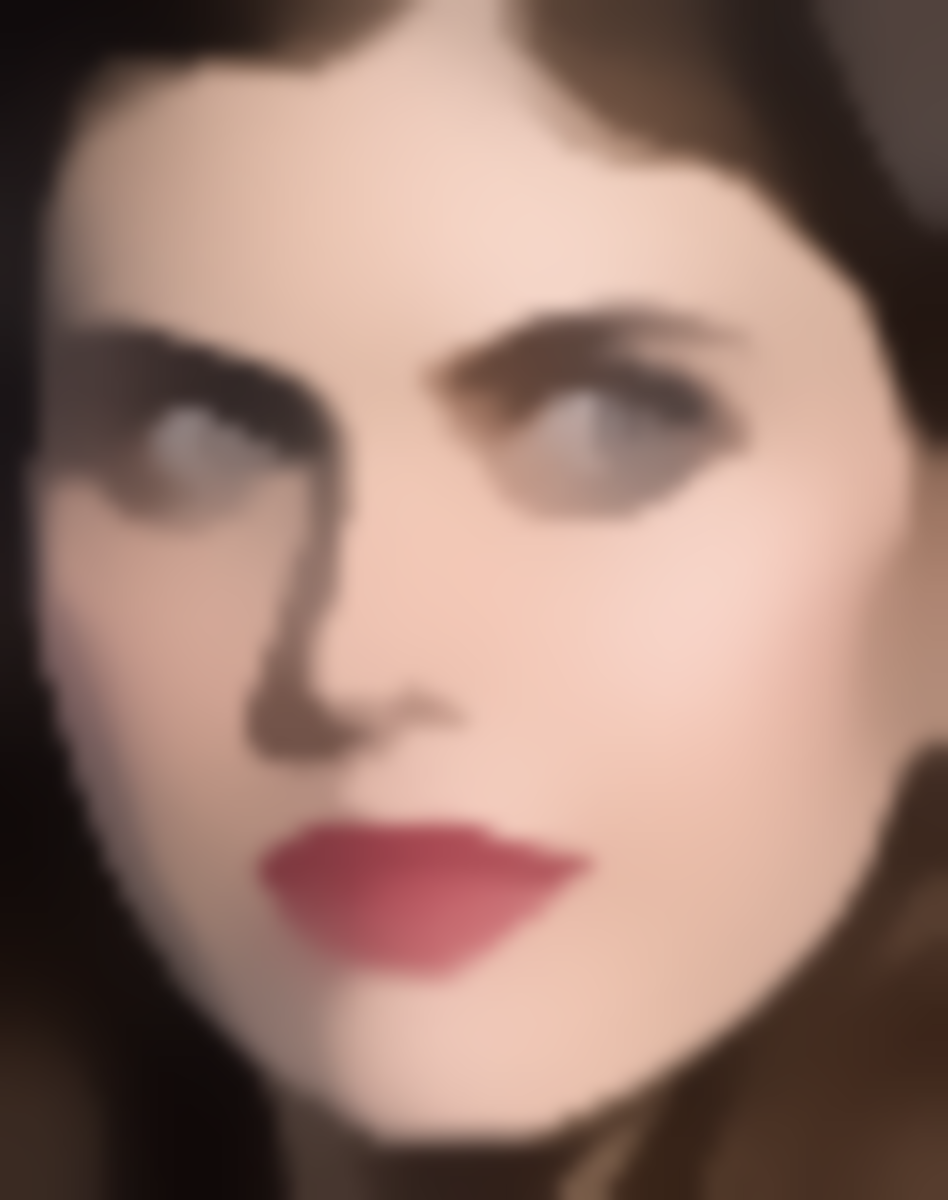

In [0]:
#TO DO
# img = np.array(mpimg.imread('pic.jpg'))
img = cv2.imread('pic.jpg')
img_shape = img.shape
print(img_shape[0], " ", img_shape[1])

#step 1
#Use bilateral filter for edge-aware smoothing.
num_down = 4# number of downsampling steps 
num_bilateral = 4 #number of bilateral filtering steps
d = 9
#usually sigma color and sigma Space have save value >150 will give cartoonish
#look
# sigmaColor har color ki avg
#sigmaSpace similar color ki avg
# downsample image using Gaussian pyramid(see opencv 'pyrDown()' function)

#pyrDown returns integers always uski waja se answer shape different aat
#what you can do is make your pix dim always divisible by 2

low_res = cv2.pyrDown(img)
for i in range(num_down-1):
  low_res = cv2.pyrDown(low_res)

# low = low_res.shape
# print(low[0], " ", low[1])
# repeatedly apply small bilateral filter instead of
# applying one large filter

sigmaColor = 25
sigmaSpace = 25

bilateral = cv2.bilateralFilter(low_res,d,sigmaColor,sigmaSpace) 
for i in range (1,num_bilateral):
  bilateral = cv2.bilateralFilter(bilateral, d, i*sigmaColor, i*sigmaSpace) 

#upsample the image by same number that was use to downscale it in the 
# upsample image to original size (see opencv 'pyrUp()' function)
for i in range(num_down):
  bilateral = cv2.pyrUp(bilateral)

low = bilateral.shape
dimension = (img_shape[1],img_shape[0])
bilateral = cv2.resize(bilateral, dimension, interpolation = cv2.INTER_AREA)

print(bilateral)
cv2_imshow(bilateral)


## Step#2
### In this step we will blur the original image. This is considered as a pre-processing step before we move on towards the edge detection step. We will apply a median filter on the image, which replaces each pixel value with the median value of all the pixels in a small neighborhood.

(1200, 948)


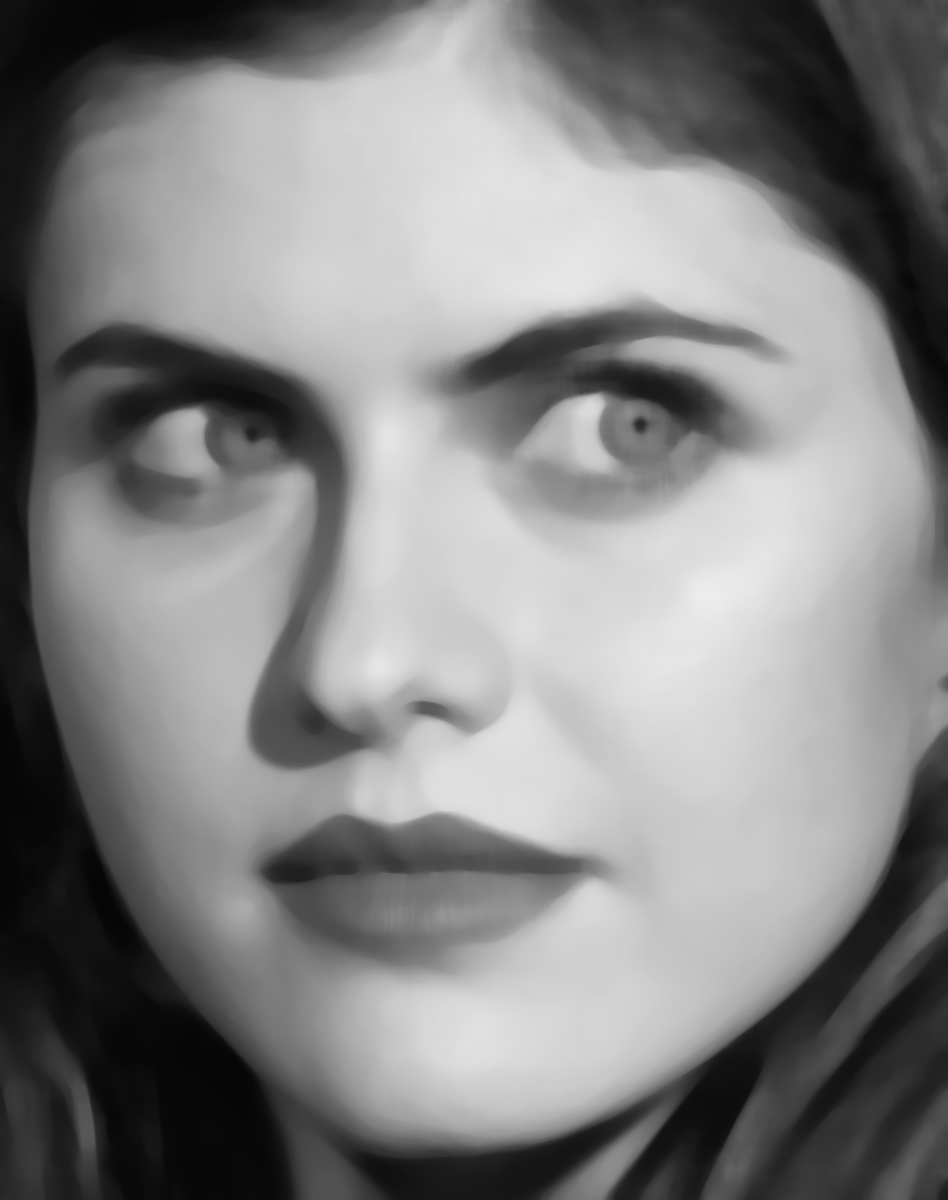

In [0]:
#TO DO
og_img = cv2.imread('pic.jpg')
#step 2
# convert to grayscale and apply median blur
#firstly grayscale conversion 
grey_pix = cv2.cvtColor(og_img,cv2.COLOR_BGR2GRAY)
print(grey_pix.shape)
#apply median filter
#ksize – aperture linear size; it must be odd and greater than 1, for example: 3, 5, 7
median_blur = cv2.medianBlur(grey_pix,23)

#By default imshow adds it's own colour key to single channel images
#so need to specify cmap
cv2_imshow(median_blur)


## Step#3

### In this step we will create an edge mask from the output produced in step#2 using adaptive thresholding 

(1200, 948)


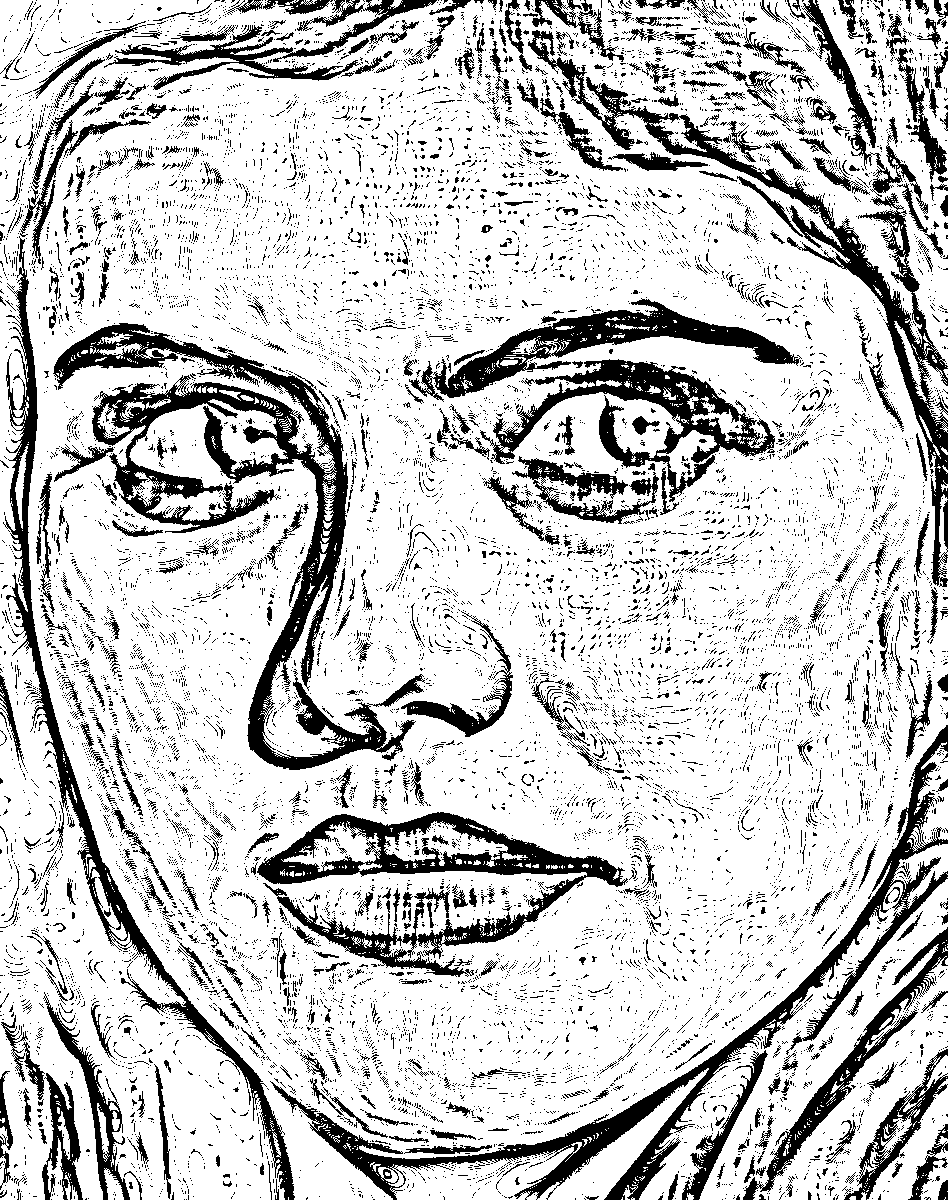

In [0]:
#TO DO
greyimage = median_blur
#step 3
# detect and enhance edges(see opencv 'adaptiveThreshold()' function)
adaptiveThreshold = cv2.adaptiveThreshold(greyimage, 255, cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY, 11, 1)
print(adaptiveThreshold.shape)

cv2_imshow(adaptiveThreshold)
# f the pixel value is smaller than the threshold, it is set to 0, otherwise it is set to a maximum value.

## Final Step

### In this step we will combine the output produced in step#1 and step#3 using a bitwise and operator to produce our final output.(Note: You need to convert output from step#3 to color first)

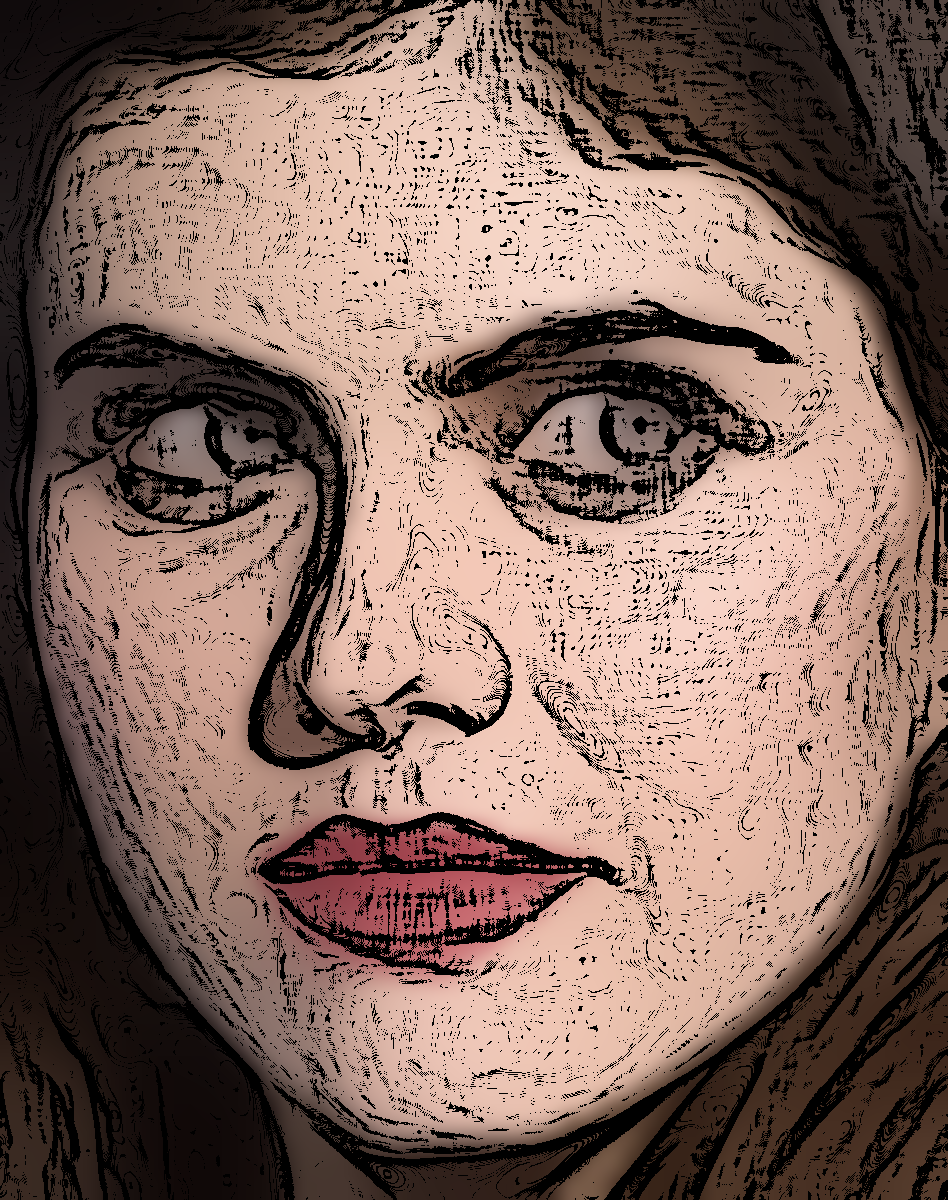

In [0]:
#TO DO
#Final Step
# convert back to color, bit-AND with color image
color_pix = cv2.cvtColor(adaptiveThreshold,cv2.COLOR_GRAY2RGB)
# print(color_pix.shape)
# bit_and = cv2.bitwise_and(bilateral,color_pix)
bit_and = (bilateral & color_pix)
cv2_imshow(bit_and)
# print(bit_and)
#show output